In [18]:
from Packages.Global import loadLabledData , EmojiInformation , Load_Hazm_Normalization
from Packages.TFIDF import findCorrelatedTerms , generateTFIDF_Vectorizer
from Packages.LearningModel import compareAllModels , generateMultinuminalNB , generateLinearSVC , generateRandomForest , generateLogisticRegression

In [19]:
# loading data
myDataFrame = loadLabledData("Datasets/Labeled_Comments_All.csv")

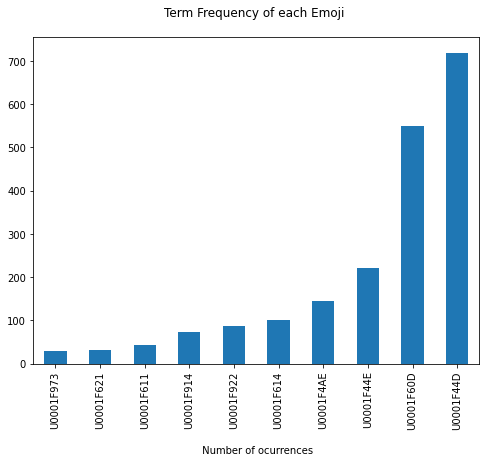

In [20]:
# Show Emoji Information
EmojiInformation (myDataFrame)

In [21]:
# add a col to data frame
myDataFrame['category_id'] = myDataFrame['Label'].factorize()[0]

In [22]:
# Create some dictonaries and dataframe for future use
category_id_df = myDataFrame[['Label', 'category_id']].sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Label']].values)

In [23]:
normalizer , tokenizer , tokens , S_Words = Load_Hazm_Normalization()

In [24]:
# Generate TFIDF Vectorize
tfidf = generateTFIDF_Vectorizer(False, normalizer.normalize, tokens, (1, 2), S_Words  )

In [25]:
#Transform each complaint into a vector
comments = myDataFrame.comment
features = tfidf.fit_transform(comments).toarray()
labels = myDataFrame.category_id

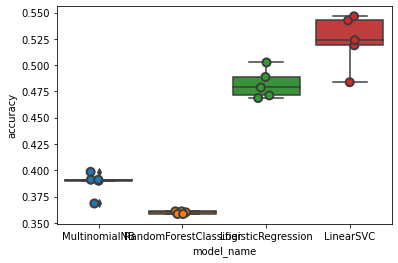

In [9]:
#Compair All Models ( MultinomialNB, LinearSVC, RandomForestClassifier, LogisticRegression )
compareAllModels(features,labels)

In [26]:
# Finding the three most correlated terms with each of the product categories
findCorrelatedTerms(tfidf, features, labels, category_to_id, 4)

# 'U0001F44D':
  . Top unigrams:
       . خوبه
       . راضیم
       . خوبیه
       . اصلا
       . عالیه
  . Top bigrams:
       . خرید داره
       . حتما بخرید
       . خریدم راضیم
       . ازش راضیم
       . خوبه راضیم
# 'U0001F44E':
  . Top unigrams:
       . اصلا
       . خراب
       . ضعیف
       . ضعیفه
       . ضعیفی
  . Top bigrams:
       . خراب میشه
       . ماندگاری ضعیفی
       . بو ضعیف
       . باطریش ضعیفه
       . اصلا خوشمزه
# 'U0001F4AE':
  . Top unigrams:
       . عاااااااالیه
       . عااالیه
       . عالیه
       . احتیاج
       . دوستش
  . Top bigrams:
       . رایحه قیمت
       . واقعا راضی
       . حتمن بخرین
       . آپدیت احتیاج
       . العاده خریدش
# 'U0001F60D':
  . Top unigrams:
       . عالیه
       . هستم
       . العاده
       . خوبه
       . زیباست
  . Top bigrams:
       . راضی هستم
       . خوش بو
       . بوی ماندگاری
       . عالیه پیشنهاد
       . خوشبو هست
# 'U0001F611':
  . Top unigrams:
       . گرونه
       . گرون
       . بدک
       . دکوری


In [11]:
# ************************** Multinomial NB ***************************
generateMultinuminalNB(myDataFrame)



*********  MultinominalNB Model Classification Report  ***********


              precision    recall  f1-score   support

           0       0.27      0.28      0.28       181
           1       0.39      0.59      0.47       181
           2       0.26      0.33      0.29       184
           3       0.31      0.19      0.23       185
           4       0.36      0.30      0.32       183
           5       0.25      0.25      0.25       179
           6       0.42      0.50      0.45       182
           7       0.29      0.21      0.24       184
           8       0.32      0.46      0.38       181
           9       0.29      0.30      0.30       178
          10       0.18      0.07      0.10       182

    accuracy                           0.31      2000
   macro avg       0.30      0.31      0.30      2000
weighted avg       0.30      0.31      0.30      2000



(Multinomial) Naive Bayes Labeling  .... 


Comment:  کالا بسیار خوب و عالی هست .. به همه توصیه می کنم
Related emo

In [12]:
# ************************** LinearSVC ***************************
generateLinearSVC( tfidf, myDataFrame, features, labels , False, category_id_df, id_to_category)



********* Linear SVC Model Classification Report ***********


              precision    recall  f1-score   support

   U0001F60D       0.48      0.48      0.48       441
   U0001F44D       0.44      0.86      0.58       576
   U0001F914       0.50      0.02      0.03        60
   U0001F4AE       0.00      0.00      0.00       119
   U0001F614       0.57      0.05      0.09        81
   U0001F44E       0.56      0.05      0.10       173
   U0001F611       0.00      0.00      0.00        31
   U0001F621       0.00      0.00      0.00        26
   U0001F922       0.71      0.07      0.13        69
   U0001F973       0.00      0.00      0.00        21

    accuracy                           0.45      1597
   macro avg       0.33      0.15      0.14      1597
weighted avg       0.43      0.45      0.36      1597



 Linear SVC Model Labeling  .... 


Comment:  کالا بسیار خوب و عالی هست .. به همه توصیه می کنم
Related emoji:  ['U0001F44D']


In [13]:
# ************************** Random Forest ***************************
generateRandomForest( tfidf, myDataFrame, features, labels , False, category_id_df, id_to_category)



*********  RandomForest Model Classification Report ***********


              precision    recall  f1-score   support

   U0001F60D       0.75      0.03      0.05       435
   U0001F44D       0.37      0.99      0.54       587
   U0001F914       0.00      0.00      0.00        59
   U0001F4AE       0.00      0.00      0.00       123
   U0001F614       0.00      0.00      0.00        69
   U0001F44E       0.00      0.00      0.00       175
   U0001F611       0.00      0.00      0.00        32
   U0001F621       0.00      0.00      0.00        23
   U0001F922       0.00      0.00      0.00        72
   U0001F973       0.00      0.00      0.00        22

    accuracy                           0.37      1597
   macro avg       0.11      0.10      0.06      1597
weighted avg       0.34      0.37      0.21      1597



 RandomForest Model Labeling  .... 


Comment:  کالا بسیار خوب و عالی هست .. به همه توصیه می کنم
Related emoji:  ['U0001F44D']


In [14]:
# ************************** Logistic Regression ***************************
generateLogisticRegression(tfidf, myDataFrame, features, labels , False, category_id_df, id_to_category)



********* Logistic Regression Model Classification Report ***********


              precision    recall  f1-score   support

   U0001F60D       0.60      0.23      0.33       441
   U0001F44D       0.39      0.96      0.55       576
   U0001F914       0.00      0.00      0.00        60
   U0001F4AE       0.00      0.00      0.00       119
   U0001F614       0.00      0.00      0.00        81
   U0001F44E       0.00      0.00      0.00       173
   U0001F611       0.00      0.00      0.00        31
   U0001F621       0.00      0.00      0.00        26
   U0001F922       0.00      0.00      0.00        69
   U0001F973       0.00      0.00      0.00        21

    accuracy                           0.41      1597
   macro avg       0.10      0.12      0.09      1597
weighted avg       0.31      0.41      0.29      1597

